# Pair Nulos
## Ejercicios gestión de nulos

En este pair programming usaremos el csv que generamos en el pair programming de ayer. El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

## Instrucciones:

1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

2. Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

4. Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# cargamos el dataframe creado en la lección anterior
df = pd.read_csv("world_data_full_apply.csv", index_col = 0)
df.head(4)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe


In [4]:
# lo primero que vamos a hacer es calcular el porcentaje de nulos que tenemos para cada columna
porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
porc_nulos

country                                  0.000000
density                                  0.000000
abbreviation                             3.589744
agricultural_land                        3.589744
land_area                               15.384615
armed_forces_size                       14.871795
birth_rate                               3.076923
calling_code                             0.512821
capital/major_city                       1.538462
co2-emissions                            6.153846
cpi                                     10.256410
cpi_change                               8.205128
currency-code                            7.692308
fertility_rate                           3.589744
forested_area                            3.589744
gasoline_price                          10.256410
gdp                                      1.025641
gross_primary_education_enrollment       3.589744
gross_tertiary_education_enrollment      6.153846
infant_mortality                         3.076923


In [5]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
abbreviation,3.589744
agricultural_land,3.589744
land_area,15.384615
armed_forces_size,14.871795
birth_rate,3.076923
calling_code,0.512821
capital/major_city,1.538462
co2-emissions,6.153846
cpi,10.256410
cpi_change,8.205128


In [6]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent'],
      dtype='object')


In [7]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJOR_CITY


capital/major_city
Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: count, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


currency-code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna LARGEST_CITY


largest_city
S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna OFFICIAL_LANGUAGE


official_language
English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: count, Length: 76, dtype: float64

........................
La distribución de las categorías para la columna CONTINENT


continent
Africa             0.271795
Europe             0.241026
Asia               0.230769
Central America    0.102564
Oceania            0.071795
South America      0.066667
North America      0.010256
Name: count, dtype: float64

........................


In [9]:
# lo primero que vamos a hacer es crear dos listas, una con los nombres de las columnas que reemplazaremos por la moda y otra para las columnas que reemplazaremos por una categoría nueva
columnas_desconocido = ['abbreviation', 'capital/major_city', 'currency-code', 'largest_city','official_language', 'continent']

In [10]:
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Uknown"
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation          0
capital/major_city    0
currency-code         0
largest_city          0
official_language     0
continent             0
dtype: int64

NUMERICAS

In [11]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agricultural_land', 'land_area', 'armed_forces_size', 'birth_rate',
       'calling_code', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')


In [12]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df[nulos_esta_num].isnull().sum() / df.shape[0]

agricultural_land                       0.035897
land_area                               0.153846
armed_forces_size                       0.148718
birth_rate                              0.030769
calling_code                            0.005128
co2-emissions                           0.061538
cpi                                     0.102564
cpi_change                              0.082051
fertility_rate                          0.035897
forested_area                           0.035897
gasoline_price                          0.102564
gdp                                     0.010256
gross_primary_education_enrollment      0.035897
gross_tertiary_education_enrollment     0.061538
infant_mortality                        0.030769
life_expectancy                         0.041026
maternal_mortality_ratio                0.071795
minimum_wage                            0.230769
out_of_pocket_health_expenditure        0.035897
physicians_per_thousand                 0.035897
population          

IndexError: index 6 is out of bounds for axis 0 with size 6

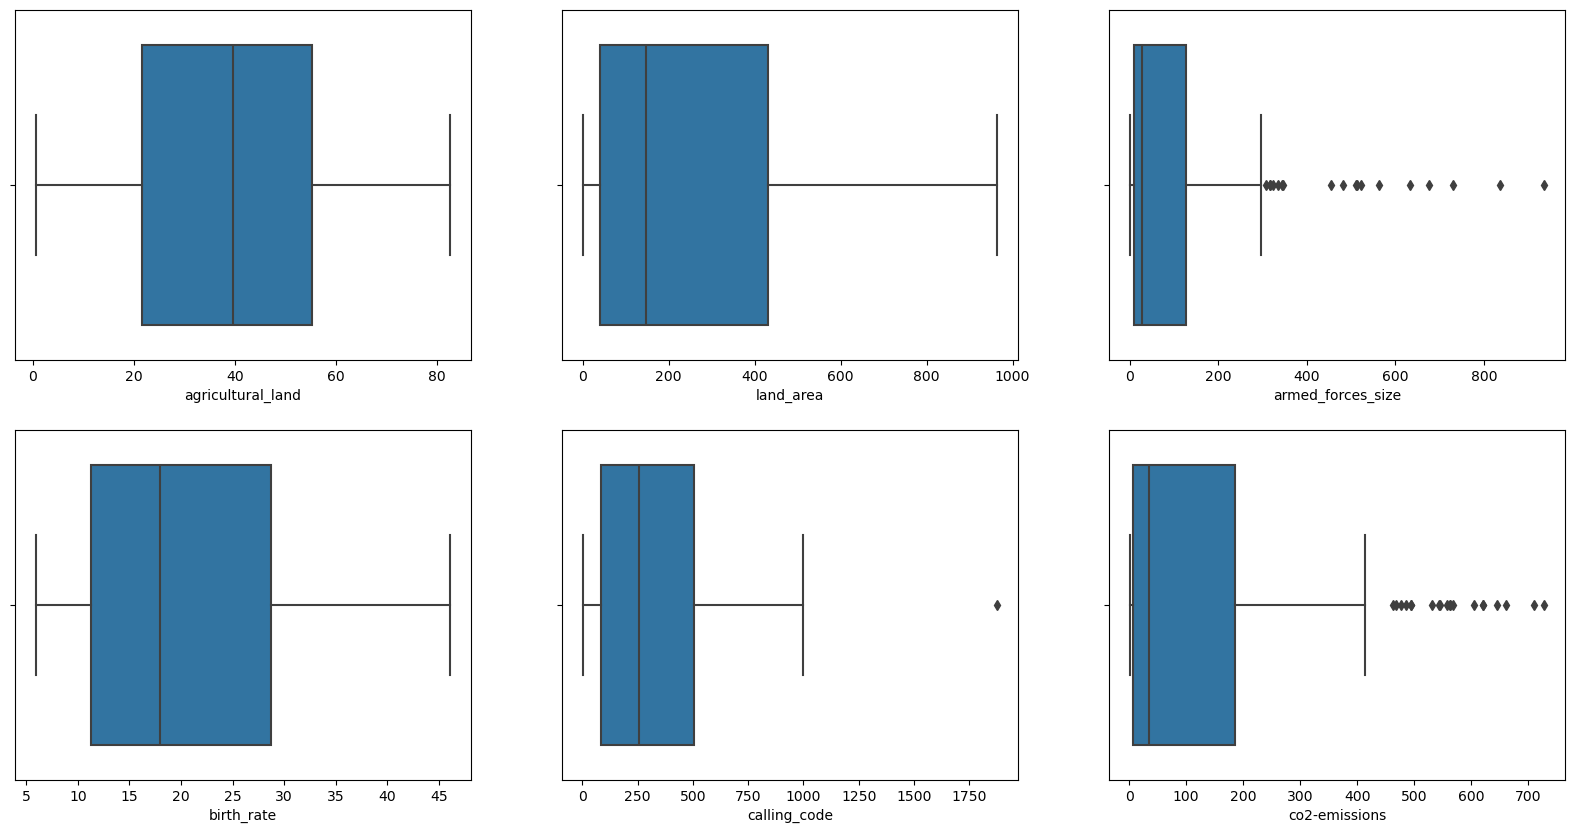

In [14]:
# Por lo tanto, el código que tenéis a continuación no es necesario que lo entendais. 

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

APLICAMOS FILLNA PARA LOS MENORES DEL 10%

In [17]:
column_names_MEDIA = [
    "agricultural_land",
    "birth_rate",
    "calling_code",
    "cpi_change",
    "fertility_rate",
    "forested_area",
    "gdp",
    "gross_primary_education_enrollment",
    "gross_tertiary_education_enrollment",
    "infant_mortality",
    "life_expectancy",
    "maternal_mortality_ratio",
    "out_of_pocket_health_expenditure",
    "physicians_per_thousand",
    "population_labor_force_participation",
    "total_tax_rate",
    "unemployment_rate",
    "latitude",
    "longitude"
]

In [18]:
# Iteramos sobre cada columna para calcular la media y rellenar los valores nulos
for col in column_names_MEDIA:
    media_col = df[col].mean()
    print(f"La media de la columna {col} es: {round(media_col, 2)}")
    
    # Aplicamos el método 'fillna()' a la columna
    df[col] = df[col].fillna(media_col)
    
    # Comprobamos los nulos para la columna
    print(f"Después del 'fillna' tenemos {df[col].isnull().sum()} nulos en la columna {col}")

La media de la columna agricultural_land es: 39.12
Después del 'fillna' tenemos 0 nulos en la columna agricultural_land
La media de la columna birth_rate es: 20.21
Después del 'fillna' tenemos 0 nulos en la columna birth_rate
La media de la columna calling_code es: 360.55
Después del 'fillna' tenemos 0 nulos en la columna calling_code
La media de la columna cpi_change es: 6.72
Después del 'fillna' tenemos 0 nulos en la columna cpi_change
La media de la columna fertility_rate es: 2.7
Después del 'fillna' tenemos 0 nulos en la columna fertility_rate
La media de la columna forested_area es: 32.02
Después del 'fillna' tenemos 0 nulos en la columna forested_area
La media de la columna gdp es: 477295901399.54
Después del 'fillna' tenemos 0 nulos en la columna gdp
La media de la columna gross_primary_education_enrollment es: 102.47
Después del 'fillna' tenemos 0 nulos en la columna gross_primary_education_enrollment
La media de la columna gross_tertiary_education_enrollment es: 37.96
Después 

ITERTIVE AND KNN

In [29]:
# como vamos a crear columnas nuevas, vamos a hacer una copia del DataFrame usando el método 'copy()'
df_copia = df.copy()
df_copia.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


In [23]:
column_names_REGRESIVO = [
    "land_area",
    "armed_forces_size",
    "cpi",
    "gasoline_price",
    "minimum_wage",
    "population",
    "urban_population"
]

In [33]:
# hemos dicho que para las mcolumnas restantes aplicaremos los dos métodos para luego compararlos, empezaremos por el IterativeImputer

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[[
    "land_area",
    "armed_forces_size",
    "cpi",
    "gasoline_price",
    "minimum_wage",
    "population",
    "urban_population"
]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

# en este caso como vamos a aplicar los dos métodos sobre estas columnas vamos a crear dos columnas nuevas
df_copia[[
    "land_area_ITERATIVE",
    "armed_forces_size_ITERATIVE",
    "cpi_ITERATIVE",
    "gasoline_price_ITERATIVE",
    "minimum_wage_ITERATIVE",
    "population_ITERATIVE",
    "urban_population_ITERATIVE"
]] = imputer_iterative_imputado

# comprobamos los nulos
null_counts = df_copia[[
        "land_area_ITERATIVE",
        "armed_forces_size_ITERATIVE",
        "cpi_ITERATIVE",
        "gasoline_price_ITERATIVE",
        "minimum_wage_ITERATIVE",
        "population_ITERATIVE",
        "urban_population_ITERATIVE"
    ]].isnull().sum()
print(f"Después del 'Iterative' tenemos: \n{null_counts} nulos")

Después del 'Iterative' tenemos: 
land_area_ITERATIVE            0
armed_forces_size_ITERATIVE    0
cpi_ITERATIVE                  0
gasoline_price_ITERATIVE       0
minimum_wage_ITERATIVE         0
population_ITERATIVE           0
urban_population_ITERATIVE     0
dtype: int64 nulos


/home/elena/anaconda33/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [35]:
# hagamos ahora lo mismo con el KNNImputer

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[[
        "land_area",
        "armed_forces_size",
        "cpi",
        "gasoline_price",
        "minimum_wage",
        "population",
        "urban_population"
    ]])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_copia[[
        "land_area_KNN",
        "armed_forces_size_KNN",
        "cpi_KNN",
        "gasoline_price_KNN",
        "minimum_wage_KNN",
        "population_KNN",
        "urban_population_KNN"
    ]] = imputer_knn_imputado


# comprobamos los nulos
null_counts_knn = df_copia[[
        "land_area_KNN",
        "armed_forces_size_KNN",
        "cpi_KNN",
        "gasoline_price_KNN",
        "minimum_wage_KNN",
        "population_KNN",
        "urban_population_KNN"
    ]].isnull().sum()
print(f"Después del 'KNN' tenemos: \n{null_counts_knn} nulos")

Después del 'KNN' tenemos: 
land_area_KNN            0
armed_forces_size_KNN    0
cpi_KNN                  0
gasoline_price_KNN       0
minimum_wage_KNN         0
population_KNN           0
urban_population_KNN     0
dtype: int64 nulos


In [36]:
df_copia.describe()[["land_area",
        "armed_forces_size",
        "cpi",
        "gasoline_price",
        "minimum_wage",
        "population",
        "urban_population",
        "land_area_KNN",
        "armed_forces_size_KNN",
        "cpi_KNN",
        "gasoline_price_KNN",
        "minimum_wage_KNN",
        "population_KNN",
        "urban_population_KNN","land_area_ITERATIVE",
        "armed_forces_size_ITERATIVE",
        "cpi_ITERATIVE",
        "gasoline_price_ITERATIVE",
        "minimum_wage_ITERATIVE",
        "population_ITERATIVE",
        "urban_population_ITERATIVE"
    ]]

,land_area,armed_forces_size,cpi,gasoline_price,minimum_wage,population,urban_population,land_area_KNN,armed_forces_size_KNN,cpi_KNN,gasoline_price_KNN,minimum_wage_KNN,population_KNN,urban_population_KNN,land_area_ITERATIVE,armed_forces_size_ITERATIVE,cpi_ITERATIVE,gasoline_price_ITERATIVE,minimum_wage_ITERATIVE,population_ITERATIVE,urban_population_ITERATIVE
count,165.000000,166.000000,175.000000,175.000000,150.000000,39.000000,45.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,255.212661,103.783133,144.193600,1.002457,2.194133,333.542718,279.461044,252.119134,102.707606,144.582777,0.996464,2.277149,287.669850,213.270398,266.861782,107.098390,144.262238,1.001202,2.287926,304.996088,202.144982
std,258.385008,167.158031,54.783998,0.368858,2.970796,296.467504,283.322352,240.346534,157.127945,52.059788,0.352197,2.715604,198.086669,211.924038,247.584618,160.586828,52.125389,0.351653,2.693562,413.182534,288.869210
min,0.000000,0.000000,99.030000,0.000000,0.010000,10.084000,5.464000,0.000000,0.000000,99.030000,0.000000,0.010000,10.084000,5.464000,0.000000,-157.935833,99.030000,0.000000,-0.030464,-1688.810110,-1114.687666
25%,41.277000,10.250000,113.670000,0.755000,0.402500,87.130000,40.765000,53.895500,12.200000,114.470000,0.765000,0.505000,117.245600,50.271400,53.895500,12.000000,114.470000,0.784552,0.485000,118.757522,59.862870
50%,148.460000,28.500000,124.740000,0.980000,1.045000,215.056000,179.039000,186.307600,40.000000,129.000000,0.980000,1.360000,223.867600,108.414600,207.600000,40.000000,129.000000,0.990000,1.360000,385.475084,238.852370
75%,430.000000,128.250000,155.925000,1.240000,2.447500,556.162500,417.765000,378.654200,123.000000,155.925000,1.185000,2.874000,402.578800,337.892500,398.754500,147.303080,155.770000,1.195000,3.005299,580.874752,387.309743
max,964.000000,936.000000,550.930000,2.000000,13.590000,973.560000,984.812000,964.000000,936.000000,550.930000,2.000000,13.590000,973.560000,984.812000,964.000000,936.000000,550.930000,2.000000,13.590000,1032.445451,984.812000


In [37]:
# ante esta situación, vamos a eliminar las columnas que ya no nos interesan para guardar el DataFrame para la lección de mañana. 
# en nuestro caso eliminaremos, "age", "padays", "euribor3m" (porque tienen nulos), "age_knn" y "euribor_knn" (porque para estas columnas podríamos haber eliminado cualquiera de las columnas derivadas de la imputación) y "pdays_iterative" (porque hemos visto que es la que peor imputaba los nulos)

df_copia.drop(["land_area", "land_area_ITERATIVE","armed_forces_size","armed_forces_size_ITERATIVE", "cpi","cpi_KNN", "gasoline_price","gasoline_price_ITERATIVE" , "minimum_wage","minimum_wage_KNN",  "population","population_ITERATIVE","urban_population_ITERATIVE","urban_population_KNN","urban_population"], axis = 1, inplace = True)

# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {"land_area_KNN": "land_area",  'armed_forces_size_KNN': "armed_forces_size", "cpi_ITERATIVE": "cpi","gasoline_price_KNN": "gasoline_price","minimun_wage_ITERATIVE": "minimun_wage", "population_KNN": "population"}
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [39]:
df_copia.head(4)

,country,density,abbreviation,agricultural_land,birth_rate,calling_code,capital/major_city,co2-emissions,cpi_change,currency-code,fertility_rate,forested_area,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,latitude,longitude,continent,cpi,minimum_wage_ITERATIVE,land_area,armed_forces_size,gasoline_price,population
0,Afghanistan,60.0,AF,58.1,32.49,93.0,Kabul,8.672,2.300000,AFN,4.47,2.1,1.910135e+10,104.0,9.700000,47.9,Kabul,64.500000,638.000000,Pashto,78.4,0.28,48.900000,9.3,71.400000,11.120000,33.939110,67.709953,Asia,149.900000,0.43,652.2300,323.0,0.70,109.1528
1,Albania,105.0,AL,43.1,11.78,355.0,Tirana,4.536,1.400000,ALL,1.62,28.1,1.527808e+10,107.0,55.000000,7.8,Tirana,78.500000,15.000000,Albanian,56.9,1.20,55.700000,18.6,36.600000,12.330000,41.153332,20.168331,Europe,119.050000,1.12,28.7480,9.0,1.36,401.5560
2,Algeria,18.0,DZ,17.4,24.28,213.0,Algiers,150.006,2.000000,DZD,3.02,0.8,1.699882e+11,109.9,51.400000,20.1,Algiers,76.700000,112.000000,Arabic,28.1,1.72,41.200000,37.2,66.100000,11.700000,28.033886,1.659626,Africa,151.360000,0.95,235.8756,317.0,0.28,176.5478
3,Andorra,164.0,AD,40.0,7.20,376.0,Andorra la Vella,469.000,6.722346,EUR,1.27,34.0,3.154058e+09,106.4,37.963388,2.7,Andorra la Vella,72.279679,160.392265,Catalan,36.4,3.33,62.738068,NaN,40.822404,6.886364,42.506285,1.521801,Europe,158.896538,6.63,468.0000,275.6,1.51,77.1420


In [38]:
# Guardamos el DataFrame para usarlo en la lección de mañana 
df_copia.to_csv("world_data_full_nulls.csv",index=False)

# RESUMEN

## CATEGORICAS
- abbreviation
- capital/major_city 
- currency-code
- largest_city
- official_language 
- continent
TODAS LAS COLUMNAS -> modificamos los nulos por UAN CATEGORIA NUEVA UNKNOWN porque no hay categoria dominante.

# NUMERICAS
- agricultural_land                       0.035897
- birth_rate                              0.030769
- calling_code                            0.005128
- co2-emissions                           0.061538
- cpi_change                              0.082051
- fertility_rate                          0.035897
- forested_area                           0.035897
- gdp                                     0.010256
- gross_primary_education_enrollment      0.035897
- gross_tertiary_education_enrollment     0.061538
- infant_mortality                        0.030769
- life_expectancy                         0.041026
- maternal_mortality_ratio                0.071795
- out_of_pocket_health_expenditure        0.035897
- physicians_per_thousand                 0.035897
- population_labor_force_participation    0.097436
- total_tax_rate                          0.061538
- unemployment_rate                       0.097436
- latitude                                0.005128
- longitude                               0.005128

ESTOS LOS CAMBIAMOS POR LA MEDIA PORQUE EL VALOR DE NULOS ES MENOR DE 10%

# NUMERICAS CON % NULOS MAYOR A 10% APLICAR METODOS PREDICTIVOS - KNN O ITERATIVE

land_area                               0.153846
armed_forces_size                       0.148718
cpi                                     0.102564
gasoline_price                          0.102564
minimum_wage                            0.230769
population                              0.800000
urban_population                        0.769231

- land_area usar KNN que modifica menos la media y la mediana
- armed_forces usar KNN que modifica menos la media y la mediana
- cpi cualquiera es válido, nos dan valores similares nos quedamos ITERATIVE por cambiar.
- gasoline price usar KNN que clava casi la media y la mediana
- minimumwage cualquiera es válido, nos dan valores similares nos quedamos ITERATIVE por cambiar.
- population usar KNN que modifica menos la media y la mediana
- urban_population eliminar porque ambos modifican mucho los datos.